In [35]:
# Import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Introduction

Using a dataset that contains data on loans from clients in a bank, I want to build a model that will predict the value of the target variable "bad_flag".

In [36]:
# Load the dataset 
data = pd.read_csv('test_task.csv')

# Data exploration and visualization 

In [37]:
# Display the first few rows
data.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0


In [38]:
# Check the dimension of the data 
print('Data dimensions:', data.shape)

Data dimensions: (4157, 22)


In [39]:
# Get summary statistics 
print(data.describe())

             loanKey   dpd_5_cnt  dpd_15_cnt  dpd_30_cnt  close_loans_cnt  \
count    4157.000000  675.000000  675.000000  675.000000      4142.000000   
mean   525386.651431    1.444444    0.733333    0.280000         1.184693   
std    202001.338206    0.900599    0.764572    0.502339         1.723715   
min     58567.000000    0.000000    0.000000    0.000000         0.000000   
25%    363964.000000    1.000000    0.000000    0.000000         0.000000   
50%    543603.000000    1.000000    1.000000    0.000000         1.000000   
75%    687271.000000    2.000000    1.000000    1.000000         2.000000   
max    884377.000000    7.000000    5.000000    3.000000        31.000000   

         TraderKey  payment_type_0  payment_type_1  payment_type_2  \
count  4157.000000     4157.000000     4157.000000     4157.000000   
mean     12.338225        0.018523        0.596103        3.755834   
std       9.902927        0.330359        2.564887        3.810703   
min       1.000000        

In [40]:
# Check for missing values 
print('Missing values: \n', data.isnull().sum())

Missing values: 
 loanKey                   0
rep_loan_date             0
first_loan                0
dpd_5_cnt              3482
dpd_15_cnt             3482
dpd_30_cnt             3482
first_overdue_date     3482
close_loans_cnt          15
federal_district_nm      11
TraderKey                 0
payment_type_0            0
payment_type_1            0
payment_type_2            0
payment_type_3            0
payment_type_4            0
payment_type_5            0
past_billings_cnt       248
score_1                 650
score_2                3918
age                       0
gender                    0
bad_flag                  0
dtype: int64


## Data visualization

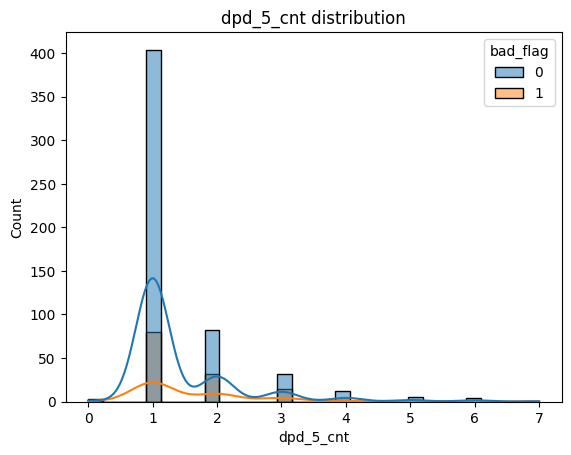

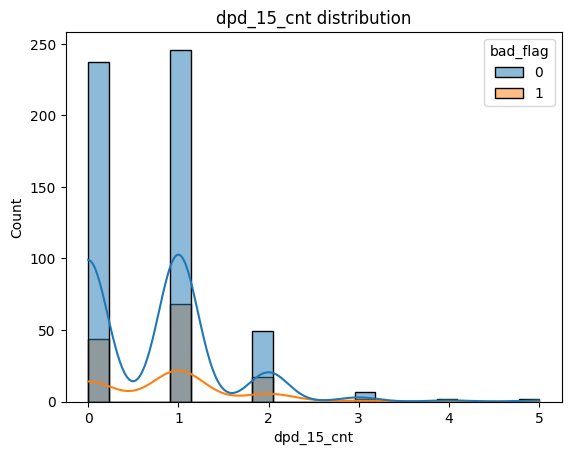

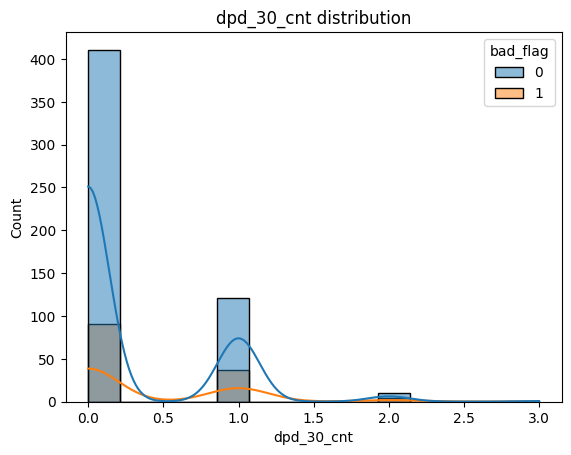

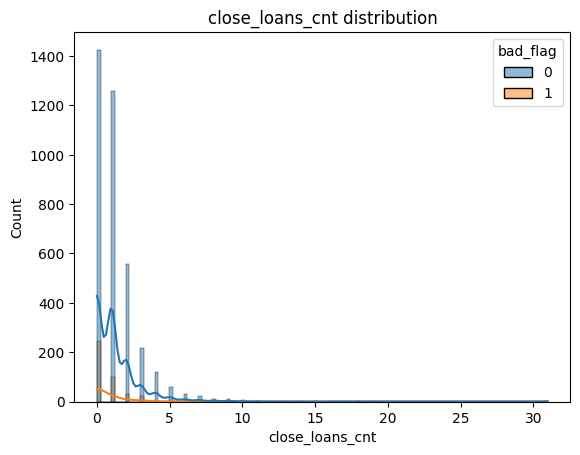

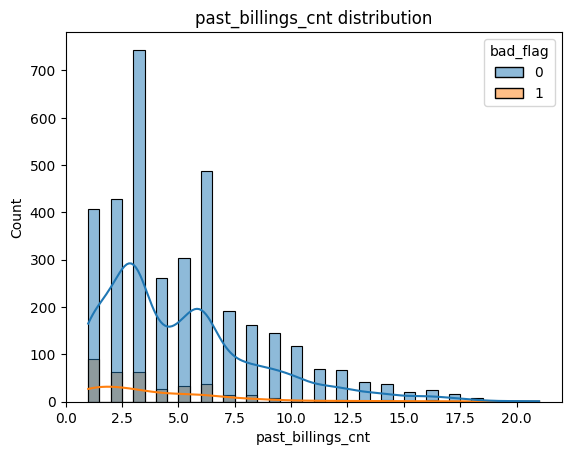

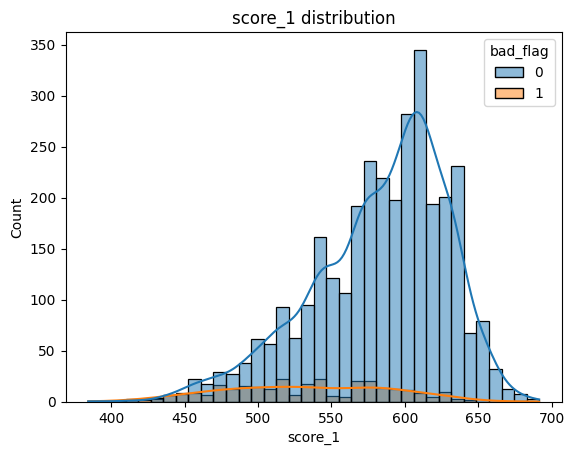

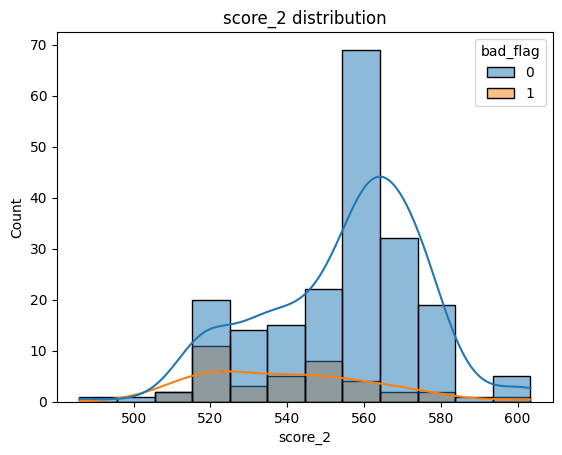

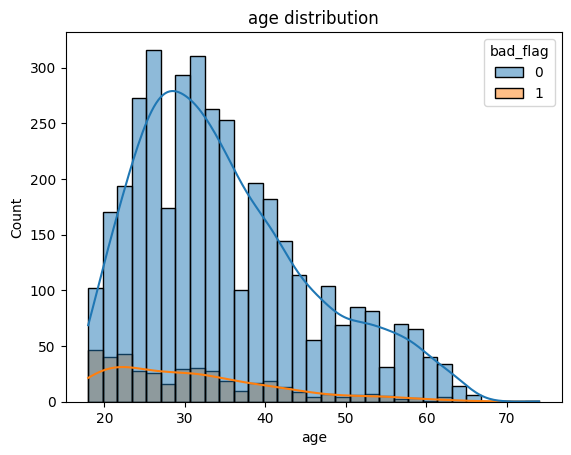

In [41]:
# Histograms for numerical features
num_features = ['dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt', 'close_loans_cnt', 'past_billings_cnt', 'score_1', 'score_2', 'age']
for feature in num_features:
    plt.figure()
    sns.histplot(data=data, x=feature, hue='bad_flag', kde=True)
    plt.title(f'{feature} distribution')

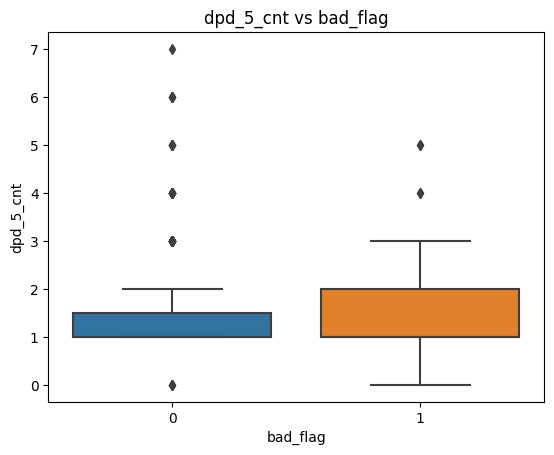

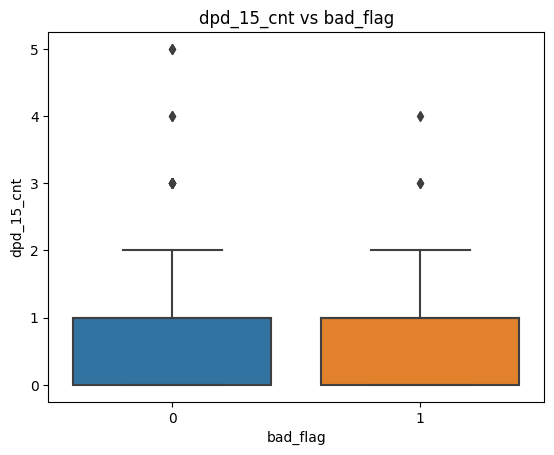

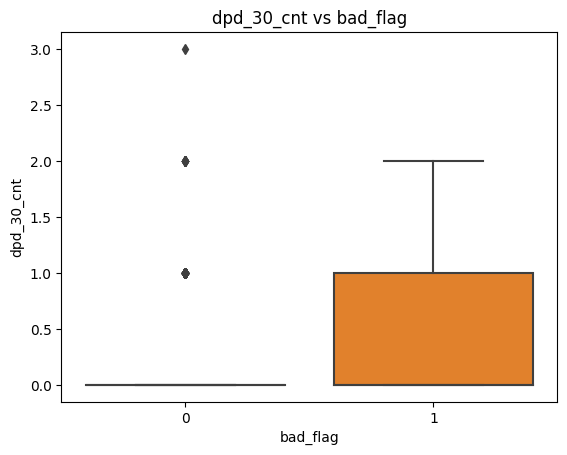

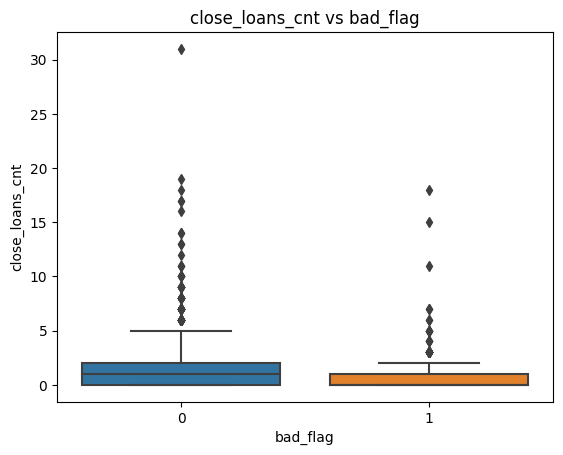

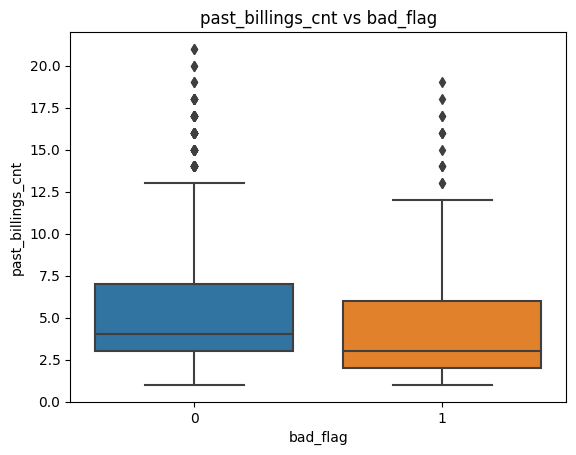

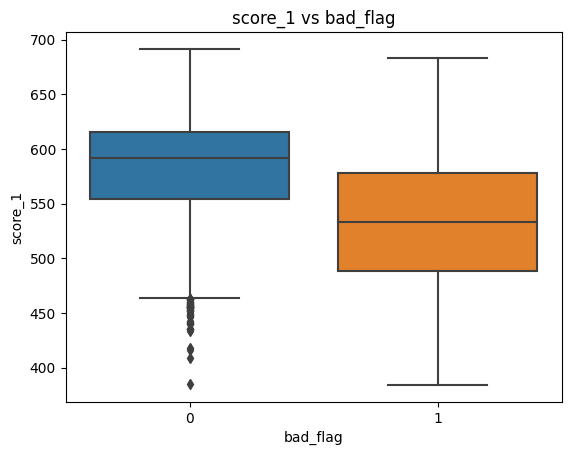

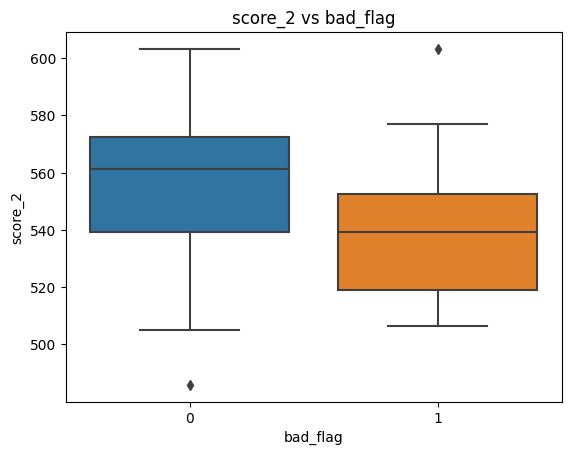

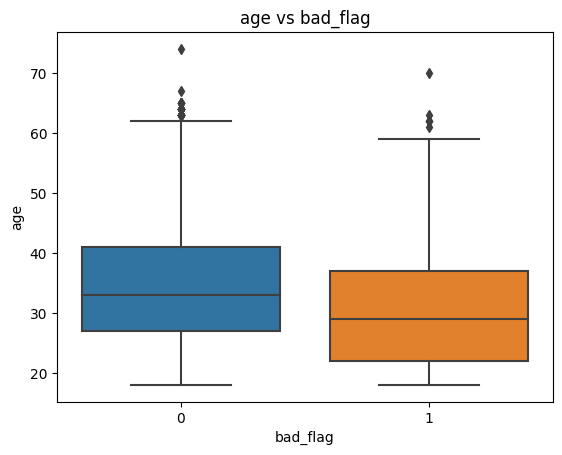

In [42]:
# Box plots for numerical features
for feature in num_features:
    plt.figure()
    sns.boxplot(x='bad_flag', y=feature, data=data)
    plt.title(f'{feature} vs bad_flag')

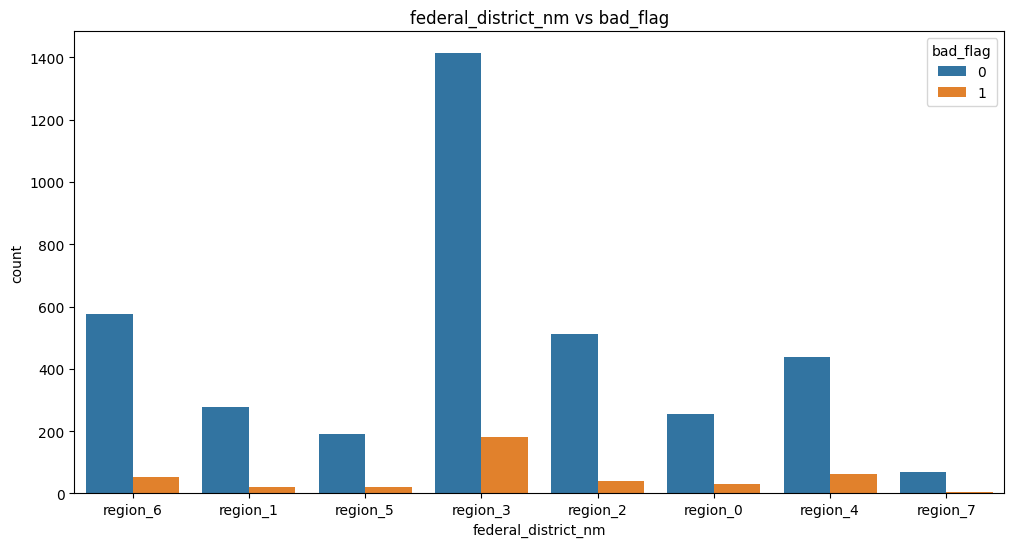

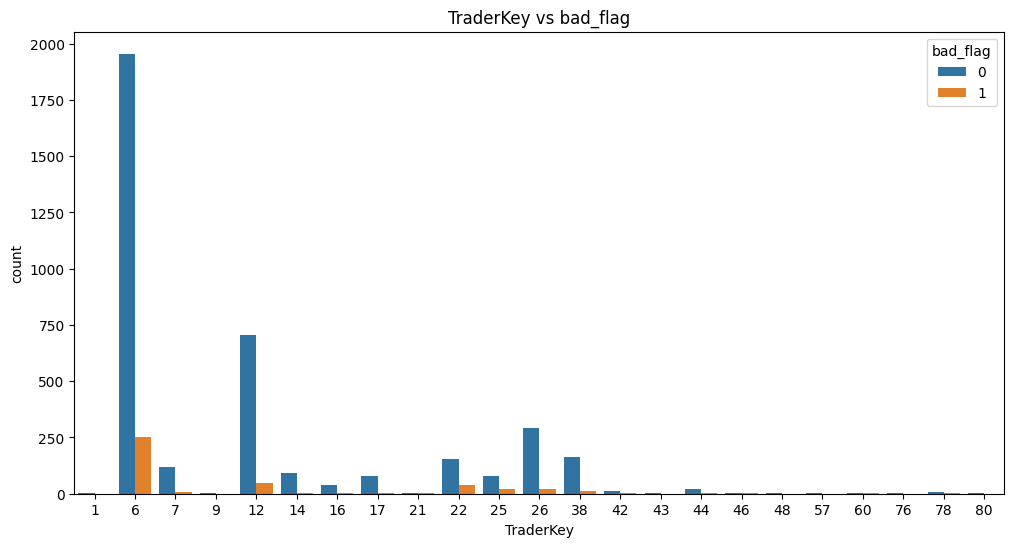

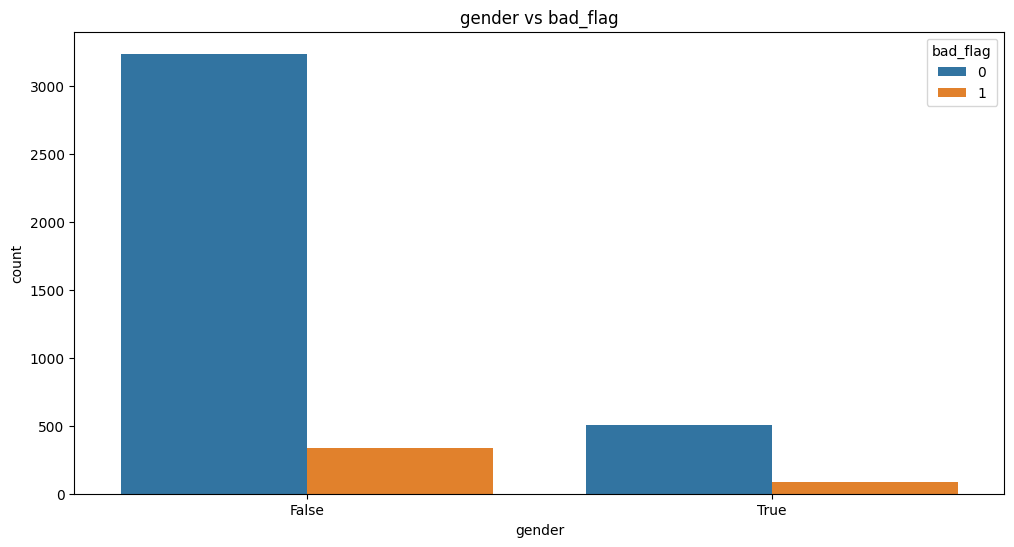

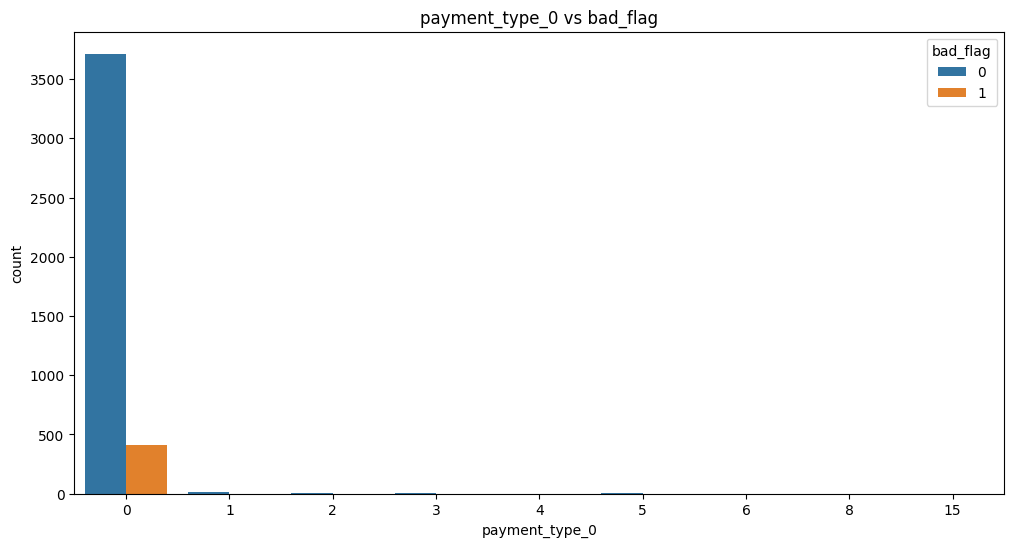

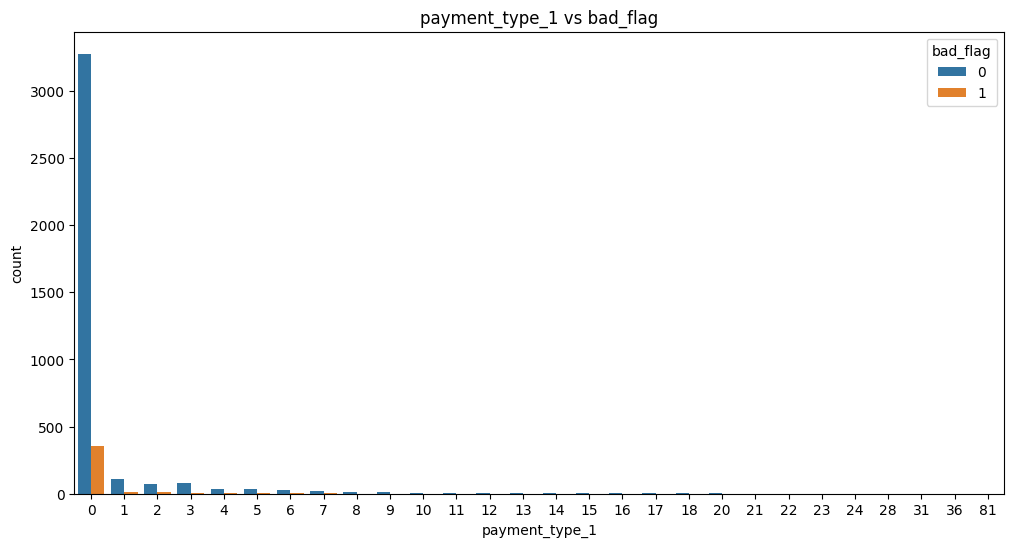

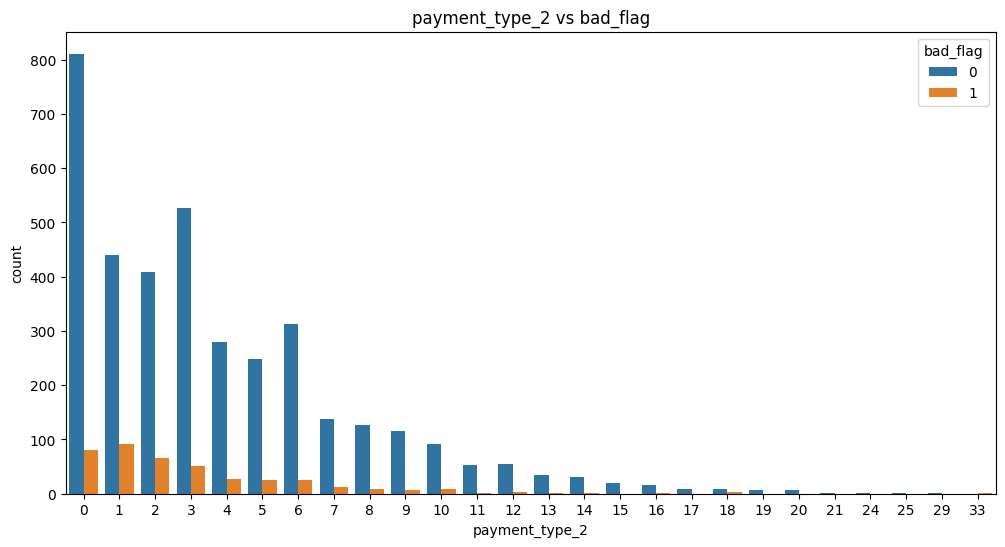

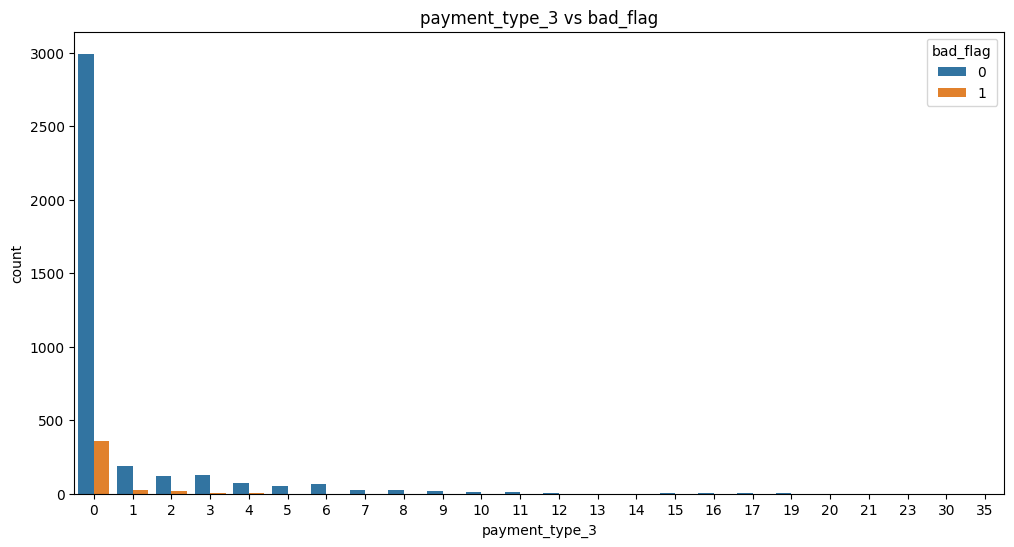

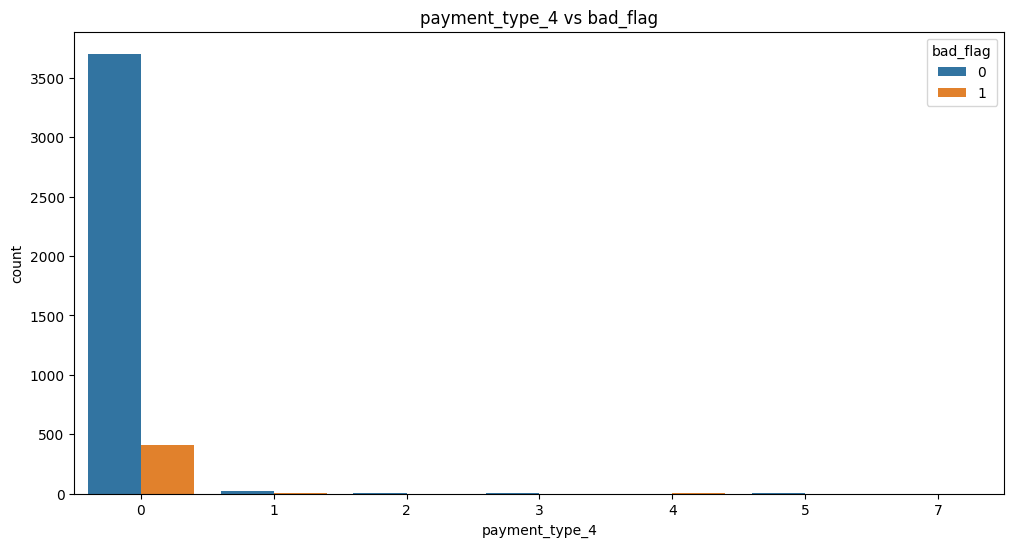

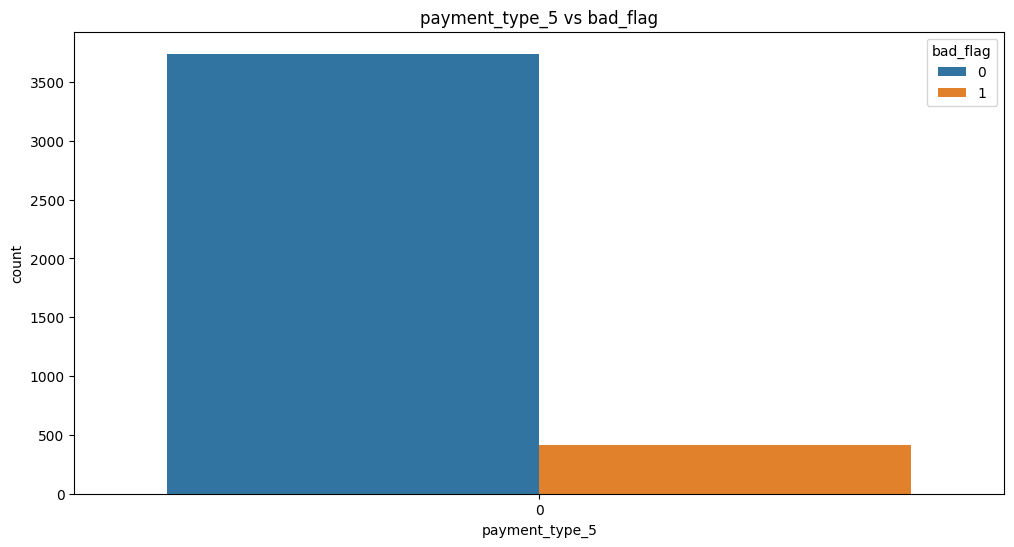

In [43]:
# Bar plots for categorical features
cat_features = ['federal_district_nm', 'TraderKey', 'gender', 'payment_type_0', 'payment_type_1', 'payment_type_2', 'payment_type_3', 'payment_type_4', 'payment_type_5']
for feature in cat_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='bad_flag', data=data)
    plt.title(f'{feature} vs bad_flag')

# Data preprocessing 

In [44]:
# Fill missing values for numerical features with their median value when the proportion of missing data is not too high
num_features_with_missing = ['close_loans_cnt', 'past_billings_cnt', 'score_1']
for feature in num_features_with_missing:
    data[feature] = data[feature].fillna(data[feature].median())

# Fill missing values for categorical features with their mode
cat_features_with_missing = ['federal_district_nm']
for feature in cat_features_with_missing:
    data[feature] = data[feature].fillna(data[feature].mode()[0])

In [45]:
# Create a new feature representing the days between the 'first_overdue_date' and 'first_loan' 
data['first_overdue_date'] = pd.to_datetime(data['first_overdue_date'])
data['first_loan'] = pd.to_datetime(data['first_loan'])

data['days_to_first_overdue'] = (data['first_overdue_date'] - data['first_loan']).dt.days

# Imputing the missing values from 'days_to_first_overdue'
imputer = KNNImputer(n_neighbors=5)

# Select the feature that needs imputation
feature_to_impute = ['days_to_first_overdue']
data[feature_to_impute] = imputer.fit_transform(data[feature_to_impute])

# Droping 'first_overdue_date'
data = data.drop('first_overdue_date', axis=1)
data = data.drop('rep_loan_date', axis=1)
data = data.drop('first_loan', axis=1)

In [ ]:
data

In [46]:
# Using KNN Imputer for the features that have a percentage of missing data too large 
imputer = KNNImputer(n_neighbors=5)

# Select the features that need imputation
features_to_impute = ['dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt', 'score_2']
data[features_to_impute] = imputer.fit_transform(data[features_to_impute])

In [47]:
print('Missing values: \n', data.isnull().sum())

Missing values: 
 loanKey                  0
dpd_5_cnt                0
dpd_15_cnt               0
dpd_30_cnt               0
close_loans_cnt          0
federal_district_nm      0
TraderKey                0
payment_type_0           0
payment_type_1           0
payment_type_2           0
payment_type_3           0
payment_type_4           0
payment_type_5           0
past_billings_cnt        0
score_1                  0
score_2                  0
age                      0
gender                   0
bad_flag                 0
days_to_first_overdue    0
dtype: int64


In [48]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['federal_district_nm', 'gender'], drop_first=True)

In [ ]:
scaler = StandardScaler()

# Apply scaling only to numerical features
data[num_features] = scaler.fit_transform(data[num_features])

# Feature Selection

## Correlation analaysis

In [49]:
correlations = data.corr()['bad_flag'].abs().sort_values(ascending=False)
print(correlations)

bad_flag                        1.000000
score_1                         0.228731
loanKey                         0.111441
age                             0.106962
past_billings_cnt               0.087996
close_loans_cnt                 0.071090
payment_type_3                  0.065221
payment_type_2                  0.061194
score_2                         0.059010
gender_True                     0.055454
days_to_first_overdue           0.041270
dpd_15_cnt                      0.038581
federal_district_nm_region_3    0.037657
federal_district_nm_region_2    0.034125
dpd_30_cnt                      0.033109
federal_district_nm_region_4    0.029427
dpd_5_cnt                       0.029109
federal_district_nm_region_1    0.025046
federal_district_nm_region_6    0.024380
payment_type_0                  0.020062
federal_district_nm_region_7    0.014674
TraderKey                       0.012134
payment_type_1                  0.011732
payment_type_4                  0.006104
federal_district

# Recursive Feature Elimination 

In [50]:
X 

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,...,age,federal_district_nm_region_1,federal_district_nm_region_2,federal_district_nm_region_3,federal_district_nm_region_4,federal_district_nm_region_5,federal_district_nm_region_6,federal_district_nm_region_7,gender_True,days_to_first_overdue
0,708382,2016-10-06,2015-11-13,1.444444,0.733333,0.28,3.0,6,0,0,...,21.0,0,0,0,0,0,1,0,0,124.454815
1,406305,2016-03-26,2015-09-28,1.000000,0.000000,0.00,0.0,6,0,0,...,20.0,0,0,0,0,0,1,0,0,124.000000
2,779736,2016-10-30,2015-12-21,1.444444,0.733333,0.28,2.0,6,0,0,...,19.0,1,0,0,0,0,0,0,0,124.454815
3,556376,2016-06-29,2015-06-30,1.444444,0.733333,0.28,1.0,14,0,0,...,21.0,0,0,0,0,0,1,0,0,124.454815
4,266968,2015-12-01,2015-08-03,1.444444,0.733333,0.28,0.0,22,0,3,...,33.0,0,0,0,0,1,0,0,0,124.454815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,1.000000,0.600000,0.40,0.0,7,0,0,...,26.0,0,0,0,0,1,0,0,0,124.454815
4153,596156,2016-08-06,2016-03-11,1.400000,1.000000,0.20,1.0,12,0,0,...,38.0,0,1,0,0,0,0,0,0,124.454815
4154,645359,2016-09-05,2016-04-30,1.000000,0.600000,0.20,1.0,12,0,0,...,21.0,0,1,0,0,0,0,0,0,124.454815
4155,730681,2016-10-14,2016-05-20,1.000000,0.600000,0.40,0.0,7,0,0,...,35.0,0,0,0,0,0,1,0,0,124.454815


In [33]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = data.drop('bad_flag', axis=1)
y = data['bad_flag']

# Scale the data and create a logistic regression model
scaler = StandardScaler()
model = LogisticRegression(max_iter=1000)

# Create the RFE object with cross-validation
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='roc_auc')
pipeline = Pipeline(steps=[('scaler', scaler), ('rfecv', rfecv)])
pipeline.fit(X, y)

# Plot the optimal number of features
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (AUC)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Print the selected features
selected_features = list(X.columns[rfecv.support_])
print("Selected features:", selected_features)

ValueError: ignored

# Model training and selection

# Model interpretation and Business Insights 

# Conclusion